In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,mean_squared_error
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('Student_Performance.csv')

In [5]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [6]:
df.duplicated().sum()


np.int64(127)

In [7]:
clean_df = df.drop_duplicates()

In [8]:
clean_df.duplicated().sum()


np.int64(0)

In [9]:
clean_df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [10]:
clean_df.rename({"Hours Studied": "Hours_Studied","Previous Scores": "Previous_Scores", "Extracurricular Activities":"ExtracurricularActivities", "Sleep Hours" : "Sleep_Hours", "Sample Question Papers Practiced": "Sample_Question_Papers_Practiced", "Performance Index": "Performance_Index" })

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [11]:
clean_df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
clean_df["Extracurricular Activities"] = le.fit_transform(clean_df["Extracurricular Activities"])
clean_df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_3808\1583253692.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df["Extracurricular Activities"] = le.fit_transform(clean_df["Extracurricular Activities"])


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


<function matplotlib.pyplot.show(close=None, block=None)>

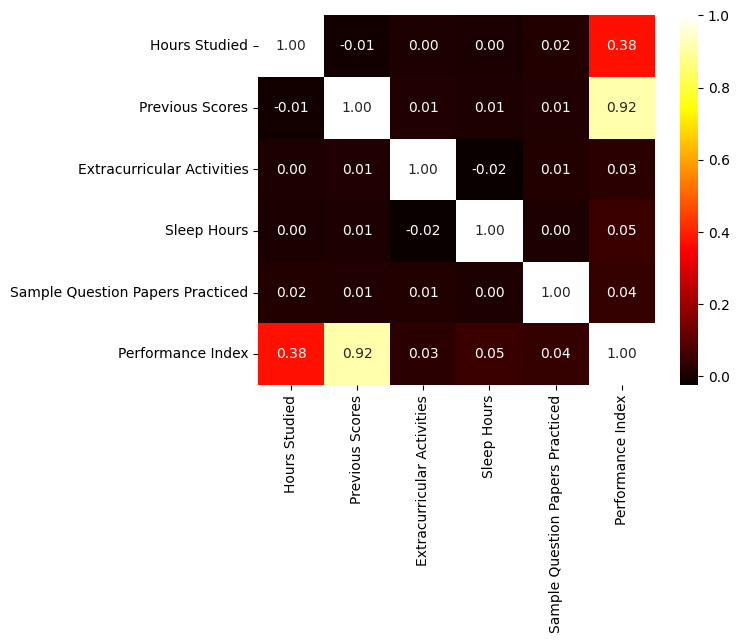

In [13]:
corr_matrix = clean_df.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'hot', fmt = '.2f')
plt.show

In [14]:
X = clean_df['Previous Scores']
Y = clean_df['Performance Index']


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size=0.25)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr = LinearRegression()

In [19]:
lr.fit(X_train.values.reshape(-1,1), Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
y_pred = lr.predict(X_test.values.reshape(-1,1))

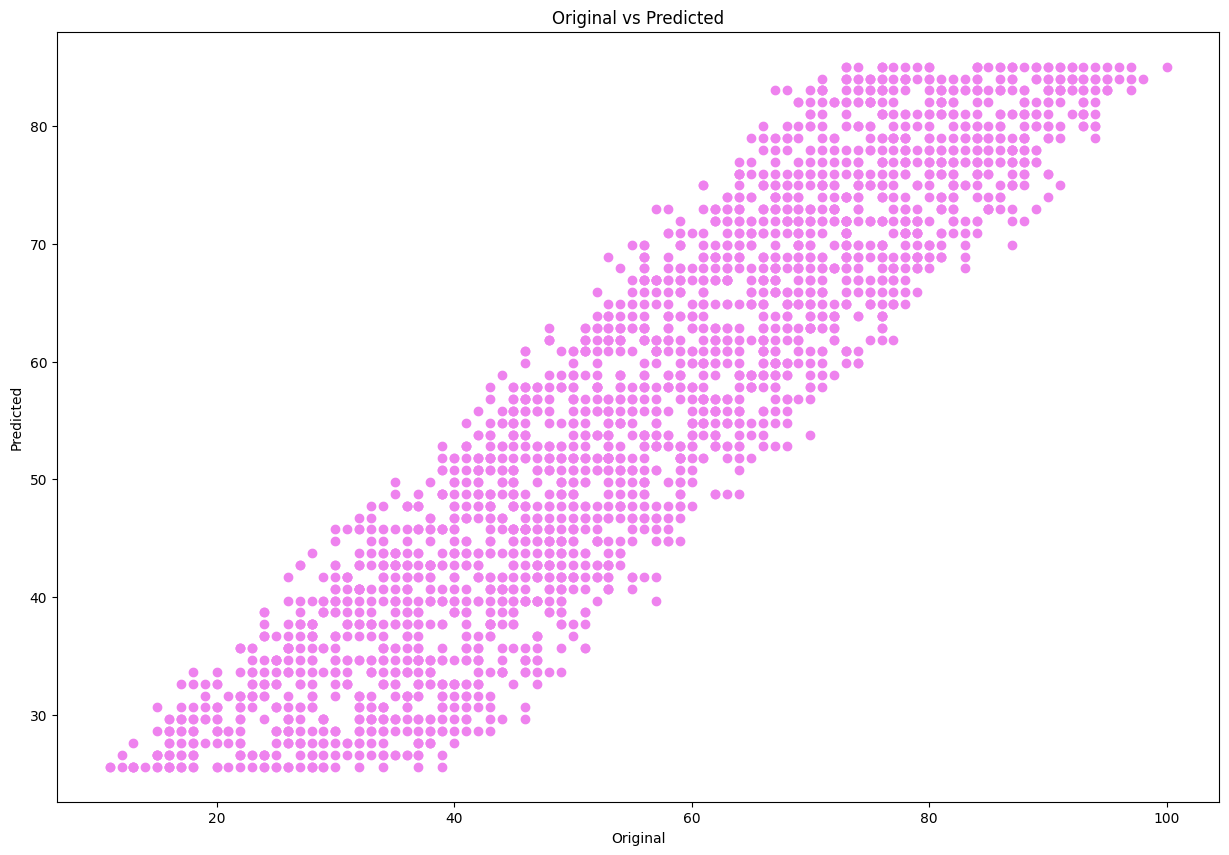

In [27]:
plt.figure(figsize=(15,10))
plt.scatter(Y_test,y_pred, color='violet')
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.title('Original vs Predicted')
plt.show()